In [1]:
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow.keras.datasets.mnist as mnist

In [4]:
import numpy as np

In [5]:
tf.__version__

'1.14.0'

#### Load data from MNIST

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Normalise

In [7]:
# Value is between 1 and 255 so dividing X_train (as x_train only contains images)these by Maximum number (255) 
x_train = x_train/255.0

In [8]:
# Array containing final predictions to be
class_ = np.array([0,1,2,3,4,5,6,7,8,9])

In [9]:
# check the input shape for our model

x_train.shape

(60000, 28, 28)

### Create a model 

In [10]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(784, activation = 'relu'),
        tf.keras.layers.Dense((784), activation = 'relu'),                
        tf.keras.layers.Dense(10)
]) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Train the model

In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 25s 412us/sample - loss: 0.1799 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0812 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0564 - acc: 0.9830
Epoch 4/5
60000/60000 [==============================] - 25s 416us/sample - loss: 0.0443 - acc: 0.9860
Epoch 5/5
60000/60000 [==============================] - 24s 392us/sample - loss: 0.0362 - acc: 0.9888


#### Evaluate our trained model

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 17.7163 - acc: 0.9778


[17.71631521661619, 0.9778]

### Predict

In [14]:
# Adding Softmax() layer in our trained model

probability_model = tf.keras.models.Sequential([ 
                    model,
                    tf.keras.layers.Softmax()])

# Predicting x_test

predictions = probability_model.predict(x_test)

In [15]:
predictions.shape

(10000, 10)

1

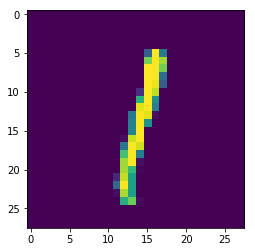

In [16]:
# checking our predictions by comparing to the input provided while prediction

index = 57
plt.imshow(x_test[index]) # input provided  while prediction
class_[np.argmax(predictions[index])] # our prediction

### Predict for only one input

In [17]:
test_pc = x_train[3]

In [18]:
# Check the input shape to the initial input
test_pc.shape

(28, 28)

In [19]:
# initial input shape
x_train.shape

(60000, 28, 28)

In [20]:
# Resize our input to the initial shape
# Our input is numpy, so we use numpy.resize()
test_pc_resized = np.resize(test_pc,(1,28,28))

In [21]:
# check shape of our input
test_pc_resized.shape

(1, 28, 28)

### Now predict

In [22]:
pred = probability_model.predict(test_pc_resized)

In [23]:
pred

array([[5.3332406e-06, 9.9083215e-01, 5.5111386e-04, 6.3045682e-08,
        6.6974194e-04, 3.7337731e-08, 4.5493223e-05, 9.9819757e-05,
        7.7961814e-03, 2.8942699e-08]], dtype=float32)

In [24]:
# Now check for maximum probability by passing it to numpy's argmax() 
final_prid = class_[np.argmax(pred)]
final_prid

1